In [1]:
import pandas as pd
import numpy as np


In [2]:
data = pd.read_csv(r"C:\Users\suban\Desktop\train.csv")
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])


In [5]:
X = data[['Pclass', 'Sex', 'Age', 'Fare']]
y = data['Survived']



In [6]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [8]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})


In [9]:
X = data[['Pclass', 'Sex', 'Age', 'Fare']]



In [10]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

X = data[['Pclass', 'Sex', 'Age', 'Fare']]
y = data['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [11]:
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Fare'] = data['Fare'].fillna(data['Fare'].median())


In [12]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

acc_dt = dt.score(X_test, y_test)
print(acc_dt)


0.7039106145251397


In [13]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

acc_rf = rf.score(X_test, y_test)
print(acc_rf)


0.7262569832402235


In [14]:
import pandas as pd

results = pd.DataFrame({
    "Algorithm": ["Decision Tree", "Random Forest"],
    "Accuracy": [acc_dt, acc_rf]
})

results


,Algorithm,Accuracy
0,Decision Tree,0.703911
1,Random Forest,0.726257


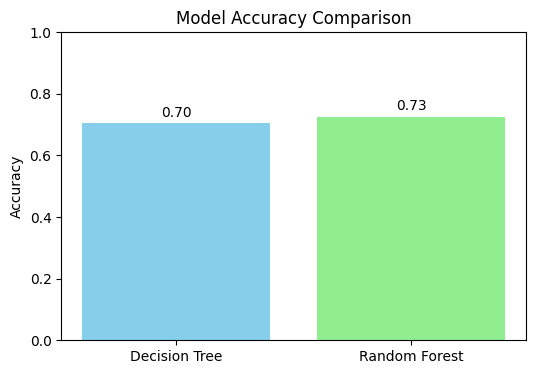

In [15]:
import matplotlib.pyplot as plt

# Algorithms and their accuracies
algorithms = ["Decision Tree", "Random Forest"]
accuracies = [acc_dt, acc_rf]

# Plot
plt.figure(figsize=(6,4))
plt.bar(algorithms, accuracies, color=['skyblue', 'lightgreen'])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
plt.show()
